In [1]:
import re

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import PowerNorm

In [2]:
columns = ["turns", "victory_status", "winner", "increment_code", "white_rating", "black_rating", "moves", "opening_name", "opening_ply"]
games = pd.read_csv("games.csv", usecols=columns)

In [3]:
def final_white_king_pos(moves):
    """
    Returns the position of the white king at the end of the game, to be used for a heatmap.
    """
    l = moves.split(" ")
    n = len(l)
    for i in range(n-1, -1, -1):
        if l[i].startswith("K"):
            if i % 2 == 0:
                return re.sub("[x+#]", "", l[i][1:])
    return "e1"

def final_black_king_pos(moves):
    """
    Returns the position of the black king at the end of the game, to be used for a heatmap.
    """
    l = moves.split(" ")
    n = len(l)
    for i in range(n-1, -1, -1):
        if l[i].startswith("K"):
            if i % 2 == 1:
                return re.sub("[x+#]", "", l[i][1:])
    return "e8"

def most_played(x):
    """
    Returns the name of the most played variation of a given opening.
    """
    v = x.value_counts()
    return v.index[0]

def frequency(x):
    """
    Returns the frequency of the most played variation of a given opening.
    """
    v = x.value_counts()
    s = v.sum()
    return v[0] / s

In [4]:
games['white_king'] = games.moves.apply(lambda x: final_white_king_pos(x))
games['black_king'] = games.moves.apply(lambda x: final_black_king_pos(x))

In [5]:
games['opening_kind'] = games.opening_name.apply(lambda x: re.split("(:|\|| #)", x)[0])

In [6]:
games.opening_kind.value_counts()

Sicilian Defense       2632
French Defense         1412
Queen's Pawn Game      1233
Italian Game            981
King's Pawn Game        917
                       ... 
Pterodactyl Defense       1
Valencia Opening          1
Australian Defense        1
Doery Defense             1
Global Opening            1
Name: opening_kind, Length: 149, dtype: int64

In [7]:
games.groupby("opening_kind")["opening_name"].agg(["count", "nunique", most_played, frequency]).sort_values(by="count", ascending=False)[:40]

,count,nunique,most_played,frequency
opening_kind,,,,
Sicilian Defense,2632,183,Sicilian Defense,0.136018
French Defense,1412,94,French Defense: Knight Variation,0.191926
Queen's Pawn Game,1233,33,Queen's Pawn Game: Mason Attack,0.188159
Italian Game,981,75,Italian Game: Anti-Fried Liver Defense,0.183486
King's Pawn Game,917,24,King's Pawn Game: Wayward Queen Attack,0.178844
Ruy Lopez,858,88,Ruy Lopez: Steinitz Defense,0.156177
English Opening,720,68,English Opening: King's English Variation,0.136111
Scandinavian Defense,716,24,Scandinavian Defense: Mieses-Kotroc Variation,0.361732
Philidor Defense,691,23,Philidor Defense #3,0.286541


In [8]:
def plot_position_heatmap(s, ax=None):
    df = pd.DataFrame(np.zeros((8,8)), index=range(8, 0, -1), columns=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'], dtype=int)
    for _, pos in s.items():
        df.loc[int(pos[1]), pos[0]] += 1
    return sns.heatmap(data=df, annot=True, norm=PowerNorm(1/5), ax=ax, cbar=False, fmt='d')

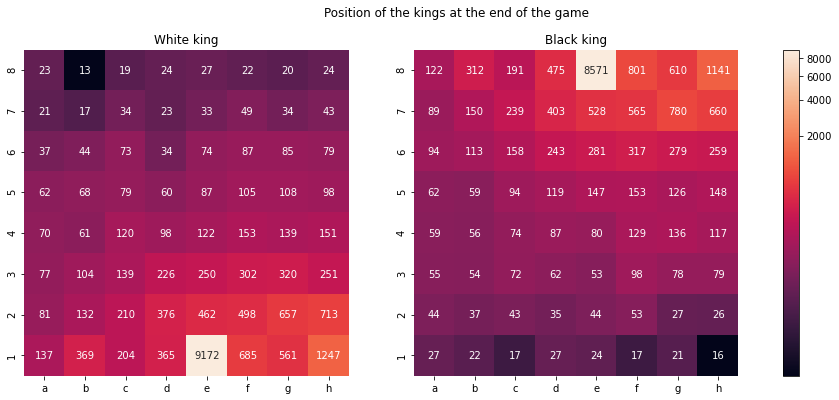

In [9]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 6))
plt.suptitle("Position of the kings at the end of the game")

axes[0].set_title ("White king")
im = plot_position_heatmap(games['white_king'], ax=axes[0])

axes[1].set_title("Black king")
plot_position_heatmap(games['black_king'], ax=axes[1])

plt.colorbar(im.get_children()[0], ax=axes, orientation='vertical');

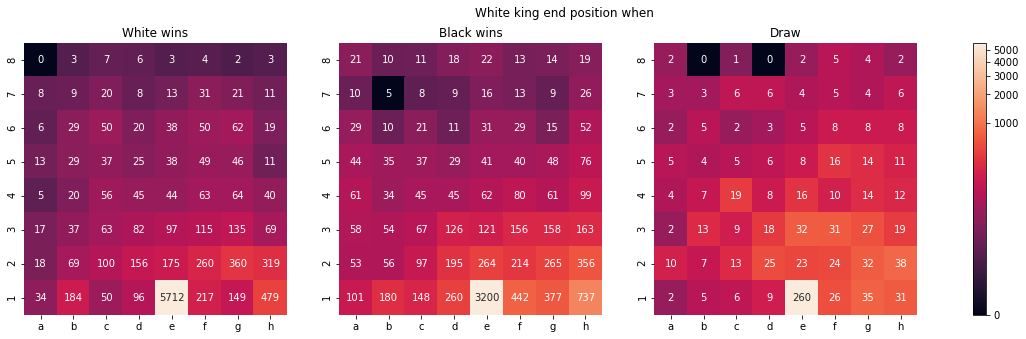

In [10]:
fig, axes = plt.subplots(ncols=3, figsize=(20, 5))

plt.suptitle("White king end position when")

axes[0].set_title ("White wins")
im = plot_position_heatmap(games['white_king'][games['winner'] == 'white'], ax=axes[0])

axes[1].set_title ("Black wins")
plot_position_heatmap(games['white_king'][games['winner'] == 'black'], ax=axes[1])

axes[2].set_title ("Draw")
plot_position_heatmap(games['white_king'][games['winner'] == 'draw'], ax=axes[2])

plt.colorbar(im.get_children()[0], ax=axes, orientation='vertical');

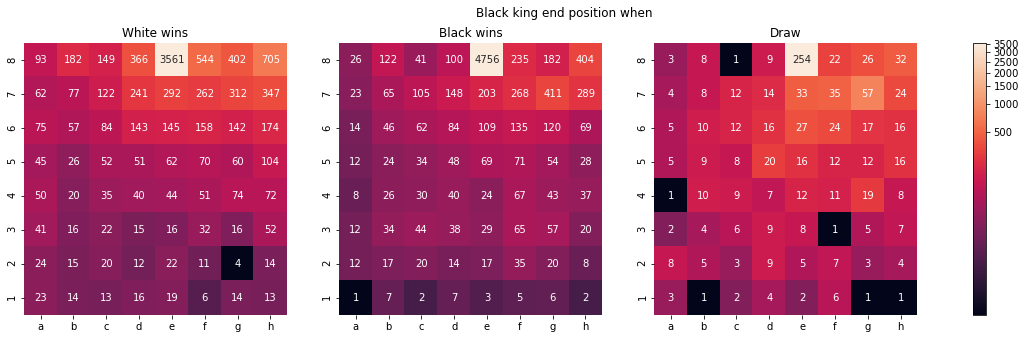

In [11]:
fig, axes = plt.subplots(ncols=3, figsize=(20, 5))

plt.suptitle("Black king end position when")

axes[0].set_title ("White wins")
im = plot_position_heatmap(games['black_king'][games['winner'] == 'white'], ax=axes[0])

axes[1].set_title ("Black wins")
plot_position_heatmap(games['black_king'][games['winner'] == 'black'], ax=axes[1])

axes[2].set_title ("Draw")
plot_position_heatmap(games['black_king'][games['winner'] == 'draw'], ax=axes[2])

plt.colorbar(im.get_children()[0], ax=axes, orientation='vertical');